In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset = 'https://www.kaggle.com/datasets/pranavuikey/zomato-eda'

In [ ]:
od.download(dataset)

100%|██████████| 89.0M/89.0M [00:22<00:00, 4.21MB/s]

In [ ]:
import os

In [ ]:
data_dir = './zomato-eda'

In [ ]:
os.listdir(data_dir)

['zomato.csv']

In [ ]:
import pandas as pd

In [ ]:
orders_df = pd.read_csv('zomato.csv')

In [ ]:
orders_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
orders_df.shape

(51717, 17)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
orders_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
#dropping unwanted columns -- 1
orders_df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list', 'listed_in(city)'],axis = 1,
            inplace = True)
orders_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [ ]:
#checking for null values -- 2
orders_df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [ ]:
print('total null values:')
orders_df.isnull().sum().sum()

total null values:


8414

In [ ]:
#renaming columns for better understanding -- 3
orders_df.rename(columns={'name':'restaurants','book_table':'booking','listed_in(city)':'city','rate':'rating',
                          'approx_cost(for two people)':'cost','listed_in(type)':'types'},inplace=True)
orders_df.head()

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
#formatting columns -- 4
#rating
orders_df["rating"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#containing 'NEW', '-', 'nan' values so making them zero and formatting remaining values.

In [ ]:
def rate(value):
    value = str(value)
    if value=='NEW' or value=='-' or value=='nan':
        return int(0)
    else:
        value=value.split('/')
        value=value[0]
        return float(value)

orders_df['rating']= orders_df['rating'].apply(rate)
orders_df['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [ ]:
orders_df['rating'].isnull().sum()

0

In [ ]:
mod = orders_df["rating"].mode()
print(mod)

0    0.0
Name: rating, dtype: float64


In [ ]:
orders_df["rating"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
#Replacing zeroes with median
def replace_zeros_with_median(orders_df, rating):
    orders_df[rating].replace(0, np.nan, inplace=True)
    median_value = orders_df[rating].median()
    orders_df[rating].fillna(median_value, inplace=True)
replace_zeros_with_median(orders_df, "rating")

In [ ]:
orders_df["rating"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
mod = orders_df["rating"].mode()
print(mod)

0    3.7
Name: rating, dtype: float64


In [ ]:
#Checking For Null values and droppin if any after filling with median

In [ ]:
print('total null values:')
orders_df.isnull().sum().sum()

total null values:


639

In [ ]:
#Dropping null values

In [ ]:
orders_df.dropna(inplace = True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   51148 non-null  object 
 1   online_order  51148 non-null  object 
 2   booking       51148 non-null  object 
 3   rating        51148 non-null  float64
 4   votes         51148 non-null  int64  
 5   location      51148 non-null  object 
 6   rest_type     51148 non-null  object 
 7   cuisines      51148 non-null  object 
 8   cost          51148 non-null  object 
 9   types         51148 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [ ]:
orders_df.isnull().values.any()

False

In [ ]:
#Finding Duplicate Rows and Removing if any

In [ ]:
orders_df[orders_df.duplicated()].count()

restaurants     19538
online_order    19538
booking         19538
rating          19538
votes           19538
location        19538
rest_type       19538
cuisines        19538
cost            19538
types           19538
dtype: int64

In [ ]:
#Removing Duplicates

In [ ]:
orders_df.drop_duplicates(inplace=True)

In [ ]:
orders_df[orders_df.duplicated()].count()

restaurants     0
online_order    0
booking         0
rating          0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
types           0
dtype: int64

In [ ]:
orders_df.shape

(31610, 10)

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31610 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   31610 non-null  object 
 1   online_order  31610 non-null  object 
 2   booking       31610 non-null  object 
 3   rating        31610 non-null  float64
 4   votes         31610 non-null  int64  
 5   location      31610 non-null  object 
 6   rest_type     31610 non-null  object 
 7   cuisines      31610 non-null  object 
 8   cost          31610 non-null  object 
 9   types         31610 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.7+ MB


In [ ]:
# Data Validation
# Column "location"

In [ ]:
orders_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [ ]:
orders_df['location'].isnull().sum()

0

In [ ]:
#Next Column 'Cost'

In [ ]:
orders_df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
#Cleaning Cost column: Removing Commas
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

orders_df['cost'] = orders_df['cost'].apply(money)

In [ ]:
orders_df['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

In [ ]:
orders_df['cost'].isnull().sum()

0

In [ ]:
# Column 'booking'

In [ ]:
orders_df['booking'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
orders_df['booking'].isnull().sum()

0

In [ ]:
# Column "online order"

In [ ]:
orders_df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
orders_df['online_order'].isnull().sum()

0

In [ ]:
# Column "restuarants"

In [ ]:
orders_df['restaurants'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [ ]:
orders_df['restaurants'].isnull().sum()

0

In [ ]:
# Column "Votes"

In [ ]:
orders_df['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [ ]:
orders_df['votes'].isnull().sum()

0

In [ ]:
# Column "rest-types"

In [ ]:
orders_df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [ ]:
orders_df['rest_type'].isnull().any()

False

In [ ]:
# Column "Cuisines"

In [ ]:
orders_df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
orders_df['cuisines'].isnull().any()

False

In [ ]:
# Column "types"

In [ ]:
orders_df['types'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
orders_df['types'].isnull().any()

False

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31610 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   31610 non-null  object 
 1   online_order  31610 non-null  object 
 2   booking       31610 non-null  object 
 3   rating        31610 non-null  float64
 4   votes         31610 non-null  int64  
 5   location      31610 non-null  object 
 6   rest_type     31610 non-null  object 
 7   cuisines      31610 non-null  object 
 8   cost          31610 non-null  int64  
 9   types         31610 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [ ]:
# Completed Data Cleaning....!!
# Starting EDA

In [ ]:
orders_df['restaurants'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [ ]:
orders_df['restaurants'].value_counts(ascending=False)

restaurants
Onesta                                                     81
Cafe Coffee Day                                            80
Empire Restaurant                                          68
Just Bake                                                  59
Kanti Sweets                                               58
                                                           ..
Coffee Thindi                                               1
#FeelTheROLL                                                1
Sri Guru Vaibhava Veg                                       1
The White Owl - Resto Cafe                                  1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8723, dtype: int64

In [ ]:
orders_df.groupby('restaurants').count().head(10)

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
restaurants,,,,,,,,,
#FeelTheROLL,1,1,1,1,1,1,1,1,1
#L-81 Cafe,2,2,2,2,2,2,2,2,2
#Vibes Restro,3,3,3,3,3,3,3,3,3
#refuel,3,3,3,3,3,3,3,3,3
'Brahmins' Thatte Idli,1,1,1,1,1,1,1,1,1
1 Fahreheit,1,1,1,1,1,1,1,1,1
1000 B.C,1,1,1,1,1,1,1,1,1
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,1,1,1,1,1,1,1,1,1
11 to 11 Express Biriyanis,2,2,2,2,2,2,2,2,2


Text(0.5, 1.0, 'Popular Restaurants')

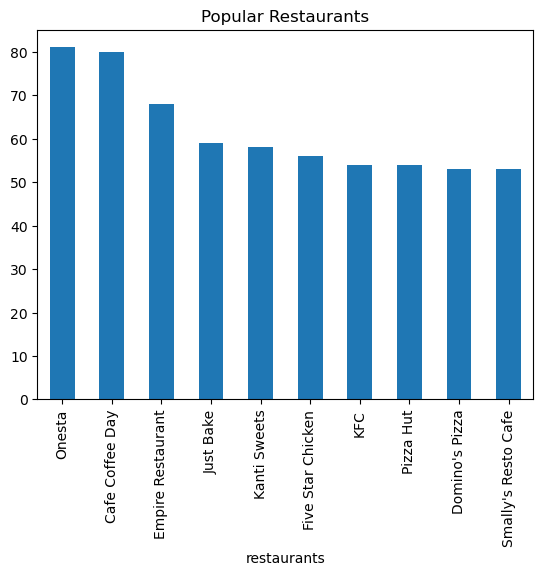

In [ ]:
orders_df['restaurants'].value_counts(ascending=False).head(10).plot(kind = 'bar')
plt.xlabel=("restaurants")
plt.title("Popular Restaurants")

In [ ]:
orders_df['online_order'].value_counts()

online_order
Yes    19104
No     12506
Name: count, dtype: int64

In [ ]:
(orders_df['online_order'].value_counts()/orders_df.shape[0])*100

online_order
Yes    60.436571
No     39.563429
Name: count, dtype: float64

Text(0.5, 1.0, 'Online Delivery')

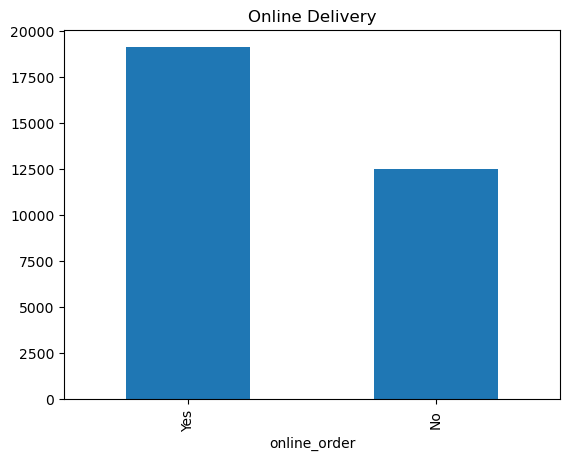

In [ ]:
orders_df['online_order'].value_counts().plot(kind = "bar")
plt.title("Online Delivery")

In [ ]:
orders_df['booking'].value_counts()

booking
No     26348
Yes     5262
Name: count, dtype: int64

In [ ]:
(orders_df['booking'].value_counts()/orders_df.shape[0])*100

booking
No     83.353369
Yes    16.646631
Name: count, dtype: float64

Text(0.5, 1.0, 'Table Booking availability')

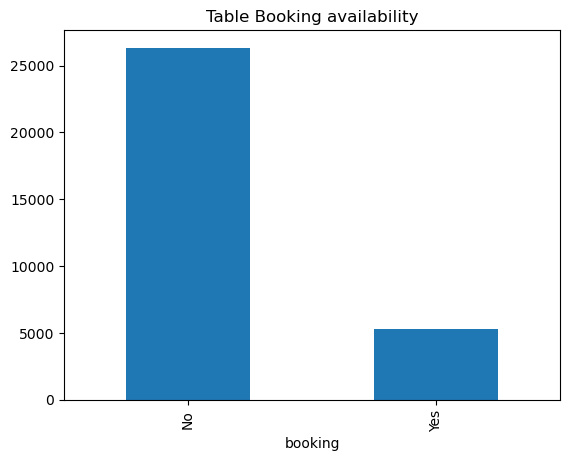

In [ ]:
orders_df['booking'].value_counts().plot(kind = "bar")
plt.title("Table Booking availability")

In [ ]:
orders_df['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
orders_df['rating'].min()

1.8

In [ ]:
orders_df['rating'].max()

4.9

In [ ]:
orders_df['rating'].mean()

3.747276178424549

In [ ]:
orders_df['rating'].mode()

0    3.7
Name: rating, dtype: float64

In [ ]:
orders_df['rating'].median()

3.7

In [ ]:
orders_df['rating'].describe()

count    31610.000000
mean         3.747276
std          0.417643
min          1.800000
25%          3.500000
50%          3.700000
75%          4.000000
max          4.900000
Name: rating, dtype: float64

,rating
restaurants,
Byg Brewski Brewing Company,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Asia Kitchen By Mainland China,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.852381
The Pizza Bakery,4.800000
Flechazo,4.800000
O.G. Variar & Sons,4.800000
AB's - Absolute Barbecues,4.783333


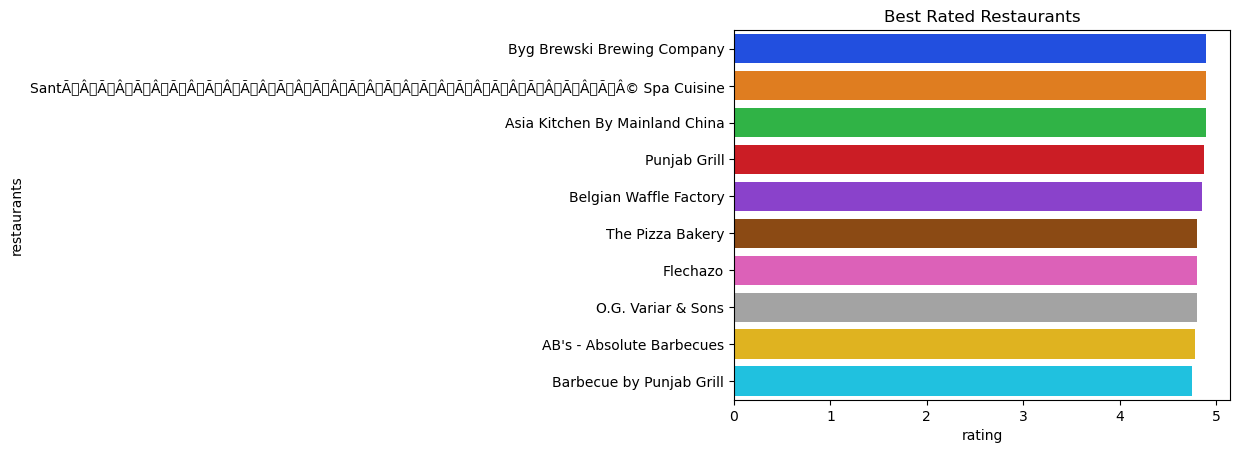

In [ ]:
rate = orders_df.groupby('restaurants')['rating'].agg('mean').sort_values(ascending=False).head(10)
sns.barplot(y=rate.index,x=rate,orient='h',palette='bright')
plt.title("Best Rated Restaurants")
display(rate.to_frame())
plt.show()

,rating
restaurants,
Alibi - Maya International Hotel,1.800000
Fusion Lounge,2.000000
Decker's Lane,2.100000
Bageecha,2.150000
Mamma Mexicana,2.200000
Taste Of Kerala,2.250000
Bhagini,2.281818
Vande Matharam,2.300000
Meghana Biryani,2.300000


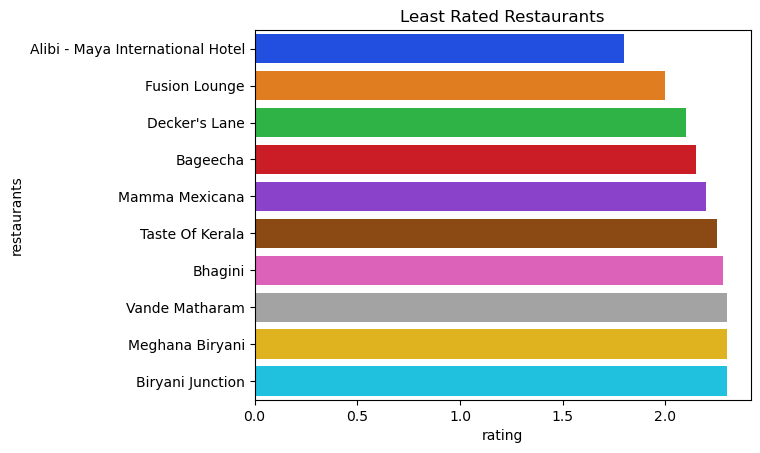

In [ ]:
rate = orders_df.groupby('restaurants')['rating'].agg('mean').sort_values().head(10)
sns.barplot(y=rate.index,x=rate,orient='h',palette='bright')
plt.title("Least Rated Restaurants")
display(rate.to_frame())
plt.show()

In [ ]:
orders_df['location'].value_counts(ascending  = False).head(20)

location
BTM                      2064
Whitefield               1805
Indiranagar              1659
HSR                      1601
Marathahalli             1524
Koramangala 5th Block    1421
JP Nagar                 1317
Electronic City          1212
Jayanagar                1097
Bannerghatta Road        1017
Bellandur                 994
Sarjapur Road             867
Brigade Road              614
New BEL Road              582
Banashankari              559
Kalyan Nagar              550
Malleshwaram              550
Brookefield               528
Koramangala 4th Block     519
MG Road                   518
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Popular Locations for Restaurants')

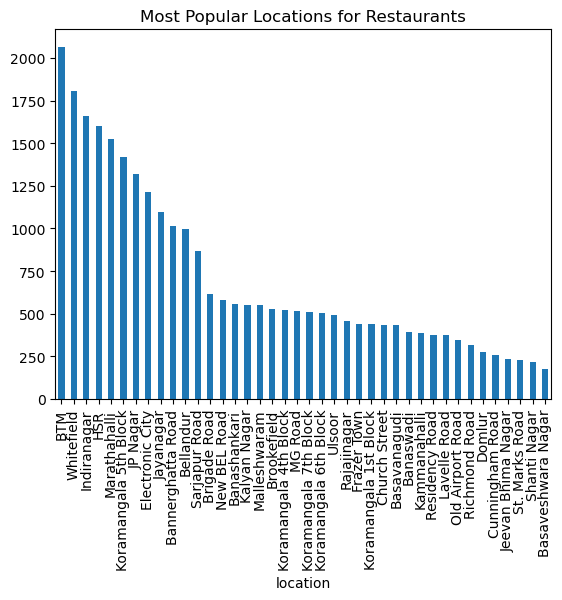

In [ ]:
orders_df['location'].value_counts().head(40).plot(kind='bar')
plt.title("Most Popular Locations for Restaurants")

In [ ]:
orders_df["rest_type"].value_counts().head(10)

rest_type
Quick Bites           10909
Casual Dining          6963
Cafe                   2369
Dessert Parlor         1348
Delivery               1324
Takeaway, Delivery     1074
Casual Dining, Bar      921
Bakery                  667
Bar                     416
Beverage Shop           414
Name: count, dtype: int64

,count
rest_type,
Quick Bites,10909
Casual Dining,6963
Cafe,2369
Dessert Parlor,1348
Delivery,1324
"Takeaway, Delivery",1074
"Casual Dining, Bar",921
Bakery,667
Bar,416


Text(0.5, 1.0, 'Popular Restaurant types')

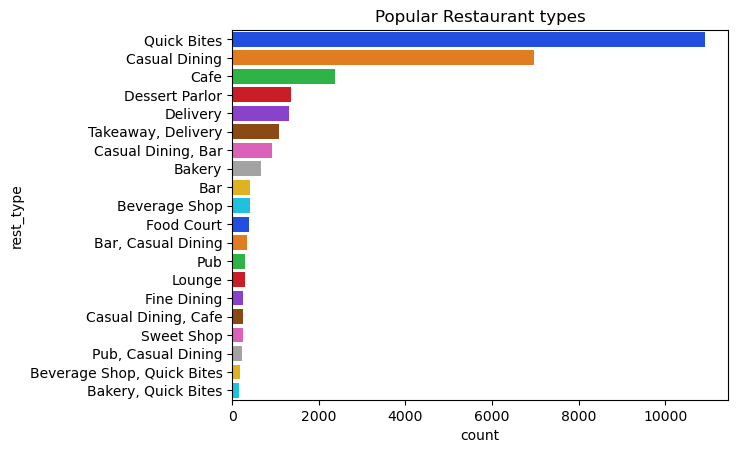

In [ ]:
resttype = orders_df["rest_type"].value_counts().head(20)
display(resttype.to_frame())
sns.barplot(x=resttype,y= resttype.index,palette='bright')
plt.title('Popular Restaurant types')

In [ ]:
orders_df['cuisines'].value_counts()

cuisines
North Indian                                                   1709
North Indian, Chinese                                          1374
South Indian                                                   1071
Bakery, Desserts                                                540
Biryani                                                         508
                                                               ... 
Andhra, Hyderabadi                                                1
North Indian, South Indian, Kerala, Chinese                       1
South Indian, Kebab, Chinese, Biryani                             1
Asian, Continental, Mediterranean, Salad, American, Biryani       1
North Indian, Chinese, Arabian, Momos                             1
Name: count, Length: 2704, dtype: int64

,count
cuisines,
North Indian,1709
"North Indian, Chinese",1374
South Indian,1071
"Bakery, Desserts",540
Biryani,508
Fast Food,424
"South Indian, North Indian, Chinese",421
Cafe,385
Desserts,385


Text(0.5, 1.0, 'Popular Cuisines')

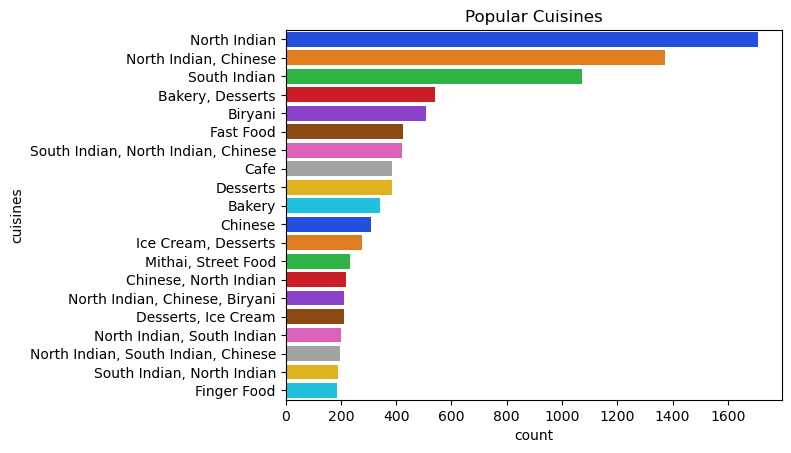

In [ ]:
cuisine = orders_df["cuisines"].value_counts().head(20)
display(cuisine.to_frame())
sns.barplot(x=cuisine,y= cuisine.index,palette='bright')
plt.title('Popular Cuisines')

Text(0.5, 1.0, 'Restaurant cost')

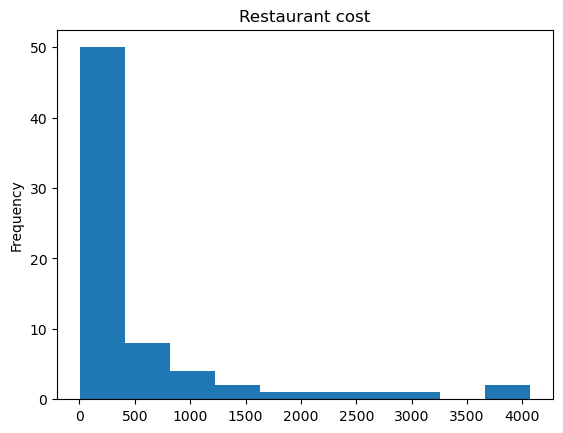

In [ ]:
orders_df["cost"].value_counts().plot(kind='hist')
plt.title("Restaurant cost")

In [ ]:
orders_df['types'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

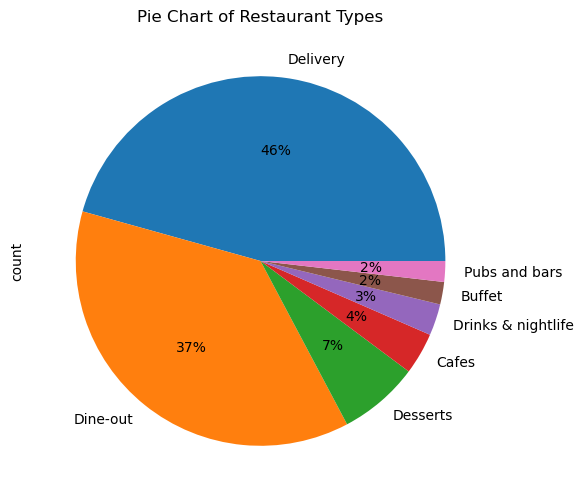

In [ ]:
orders_df["types"].value_counts().plot.pie(figsize = (6, 6),autopct = '%1.0f%%')
plt.title("Pie Chart of Restaurant Types")
plt.show()

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31610 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   31610 non-null  object 
 1   online_order  31610 non-null  object 
 2   booking       31610 non-null  object 
 3   rating        31610 non-null  float64
 4   votes         31610 non-null  int64  
 5   location      31610 non-null  object 
 6   rest_type     31610 non-null  object 
 7   cuisines      31610 non-null  object 
 8   cost          31610 non-null  int64  
 9   types         31610 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [ ]:
# Completed Univariate analysis
# Doing some Bivariate Analysis in the part of Exploratory Data Analysis

<Axes: title={'center': 'Online order vs rating'}, xlabel='online_order', ylabel='rating'>

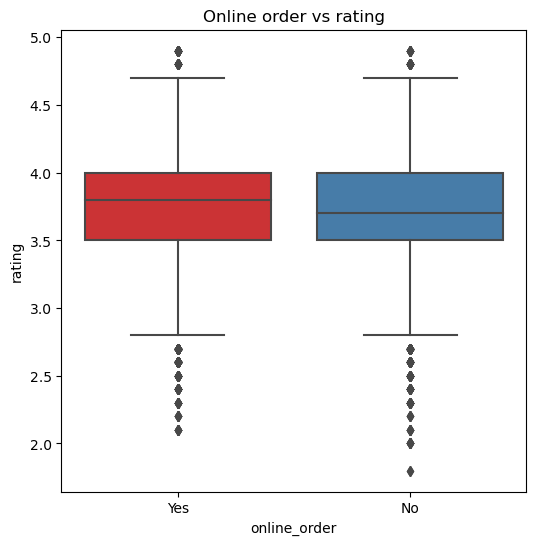

In [ ]:
#Online Order Vs Rating
plt.figure(figsize=(6,6))
plt.title('Online order vs rating')
sns.boxplot(x='online_order',y='rating',data=orders_df,palette='Set1')

<Axes: title={'center': 'Booking vs rating'}, xlabel='booking', ylabel='rating'>

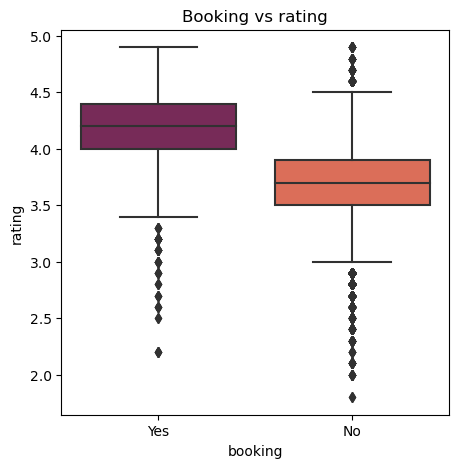

In [ ]:
#Booking vs rating
plt.figure(figsize=(5,5))
plt.title('Booking vs rating')
sns.boxplot(x='booking',y='rating',data=orders_df,palette='rocket')

Text(0.5, 1.0, 'Location by Average Cost')

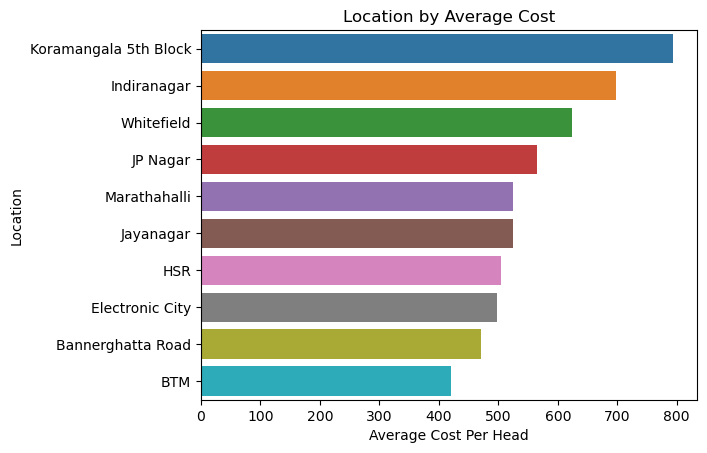

In [ ]:
# Location Vs Cost
res_chain = orders_df['cost'].groupby(orders_df['location'],sort=True)
dic={}
for i,j in orders_df['location'].value_counts()[:10].to_dict().items():
    dic[i]=round(res_chain.get_group(i).mean(),2)
cost_df = pd.DataFrame(list(dic.items()),columns=['Location',"Average Cost Per Head"])


sns.barplot(data = cost_df.sort_values(by=['Average Cost Per Head'],ascending=False),
            x = 'Average Cost Per Head',y = 'Location')
plt.title('Location by Average Cost')

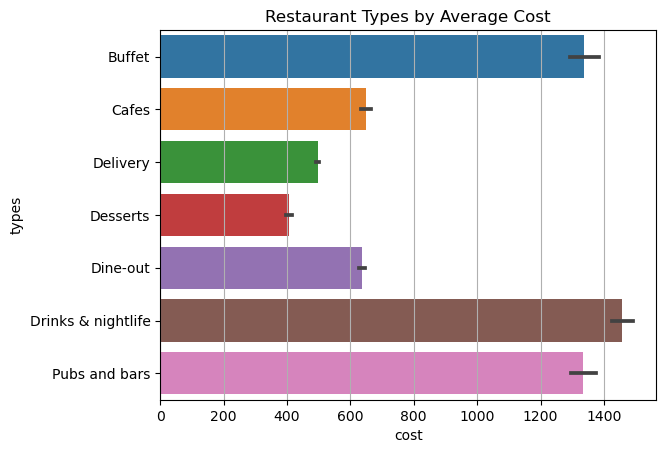

In [ ]:
#Avg Cost vs Type of Restaurant
sns.barplot(y = orders_df["types"], x = orders_df["cost"])
plt.title('Restaurant Types by Average Cost')
plt.grid(axis = 'x')

In [ ]:
#MultiVariate Analysis
# Restaurant Types Vs Averge Rating Vs Average cost

orders_df.groupby('types')[['rating', 'cost']].agg('mean')

,rating,cost
types,,
Buffet,4.054267,1338.486312
Cafes,3.906309,648.444252
Delivery,3.700817,496.707626
Desserts,3.789273,405.381508
Dine-out,3.725013,636.578229
Drinks & nightlife,4.077612,1457.520092
Pubs and bars,4.053484,1334.407666


In [ ]:
orders_df.to_csv('zomato.csv', index=False)

In [ ]:
# Phase 2

In [ ]:
orders_df.head()

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
orders_df['online_order'] = pd.get_dummies(orders_df['online_order'], drop_first=True).astype('int')
orders_df.head()

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
orders_df['booking'] = pd.get_dummies(orders_df['booking'], drop_first=True).astype('int')
orders_df.head()

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
# Correlation Matrix

<Axes: >

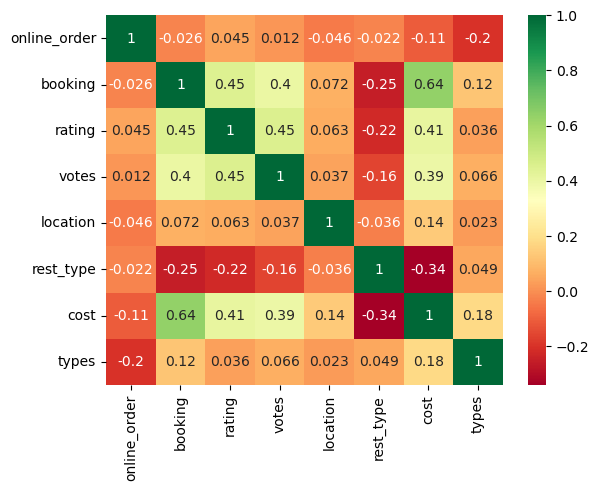

In [ ]:
orders_df['location'] = orders_df['location'].astype('category')
orders_df['location'] = orders_df['location'].cat.codes

orders_df['rest_type'] = orders_df['rest_type'].astype('category')
orders_df['rest_type'] = orders_df['rest_type'].cat.codes

orders_df['types'] = orders_df['types'].astype('category')
orders_df['types'] = orders_df['types'].cat.codes

cdf = orders_df.drop(['restaurants', 'cuisines'], axis=1)
sns.heatmap(cdf.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [ ]:
# Converting Rating column into classes

In [ ]:
data = orders_df
data['rating_binary'] = (data['rating'] > 3.5).astype(int)
data.head()

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types,rating_binary
0,Jalsa,1,1,4.1,775,1,27,"North Indian, Mughlai, Chinese",800,0,1
1,Spice Elephant,1,0,4.1,787,1,27,"Chinese, North Indian, Thai",800,0,1
2,San Churro Cafe,1,0,3.8,918,1,22,"Cafe, Mexican, Italian",800,0,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,78,"South Indian, North Indian",300,0,1
4,Grand Village,0,0,3.8,166,4,27,"North Indian, Rajasthani",600,0,1


In [ ]:
X = data.drop(['rating_binary','restaurants', 'rating', 'cuisines'], axis = 1)
X.head()

,online_order,booking,votes,location,rest_type,cost,types
0,1,1,775,1,27,800,0
1,1,0,787,1,27,800,0
2,1,0,918,1,22,800,0
3,0,0,88,1,78,300,0
4,0,0,166,4,27,600,0


In [ ]:
Y = data['rating_binary']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: rating_binary, dtype: int32

In [ ]:
# Importing ML Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_score = accuracy_score(Y_test, logistic_reg_pred)
print("Logistic Regression Accuracy:", logistic_reg_score)

Logistic Regression Accuracy: 0.7435410734999472


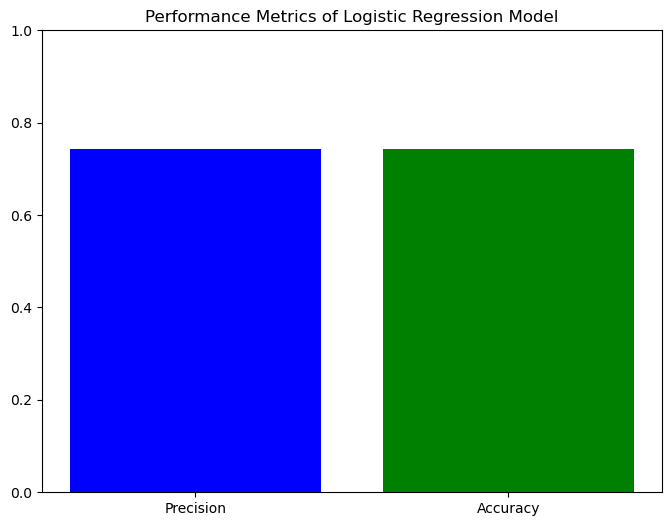

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

lr_precision = precision_score(Y_test, logistic_reg_pred)
lr_accuracy = accuracy_score(Y_test, logistic_reg_pred)

values = [lr_precision, lr_accuracy]
labels = ['Precision', 'Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Performance Metrics of Logistic Regression Model')

plt.ylim(0, 1)
plt.show()


In [ ]:
# k-NN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_pred)
print("k-NN accuracy:", knn_accuracy)

k-NN accuracy: 0.8500474533375514


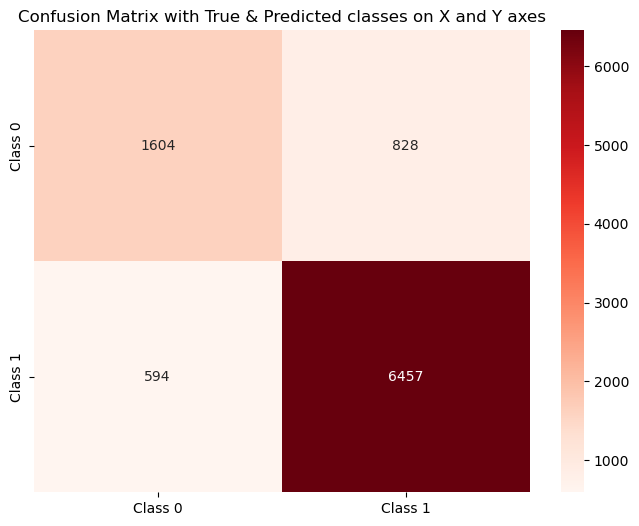

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(Y_test, knn_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'],
           )

plt.title('Confusion Matrix with True & Predicted classes on X and Y axes')
plt.show()

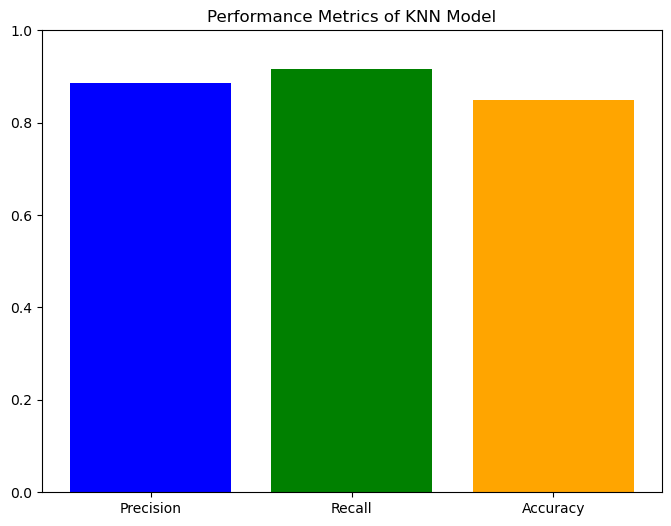

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

knn_precision = precision_score(Y_test, knn_pred)
knn_recall = recall_score(Y_test, knn_pred)
knn_accuracy = accuracy_score(Y_test, knn_pred)

values = [knn_precision, knn_recall, knn_accuracy]
labels = ['Precision', 'Recall', 'Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics of KNN Model')

plt.ylim(0, 1)
plt.show()


In [ ]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = svm.score(X_test, Y_test)
print("Support Vector Machine accuracy Score:", svm_accuracy)

Support Vector Machine accuracy Score: 0.7435410734999472


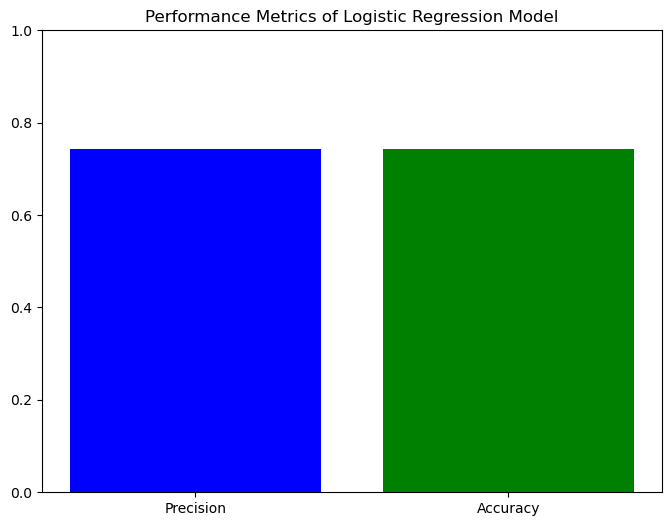

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

svm_precision = precision_score(Y_test, svm_pred)
svm_accuracy = accuracy_score(Y_test, svm_pred)

values = [svm_precision, svm_accuracy]
labels = ['Precision', 'Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Performance Metrics of Logistic Regression Model')

plt.ylim(0, 1)
plt.show()

In [ ]:
# Naive Bayes (Gaussian)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(Y_test, naive_bayes_pred)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)

Naive Bayes Accuracy: 0.5188231572287251


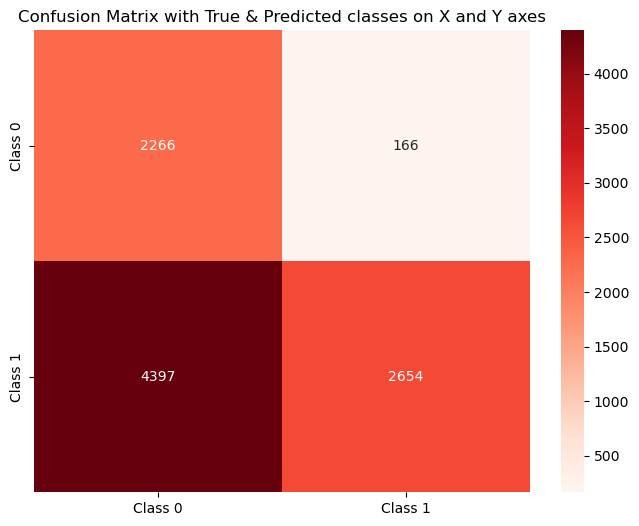

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(Y_test, naive_bayes_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'],
           )

plt.title('Confusion Matrix with True & Predicted classes on X and Y axes')
plt.show()

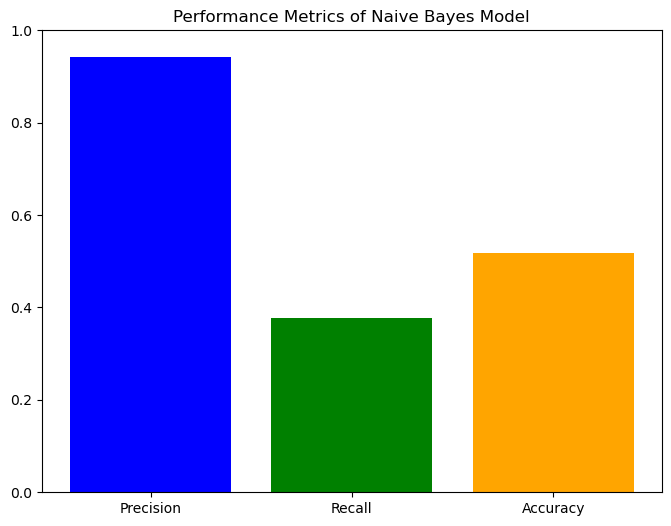

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

nb_precision = precision_score(Y_test, naive_bayes_pred)
nb_recall = recall_score(Y_test, naive_bayes_pred)
nb_accuracy = accuracy_score(Y_test, naive_bayes_pred)

values = [nb_precision, nb_recall, nb_accuracy]
labels = ['Precision', 'Recall', 'Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics of Naive Bayes Model')

plt.ylim(0, 1)
plt.show()


In [ ]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)

rf_pred = random_forest_model.predict(X_test)

rf_accuracy = accuracy_score(Y_test, rf_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.8873774122113255


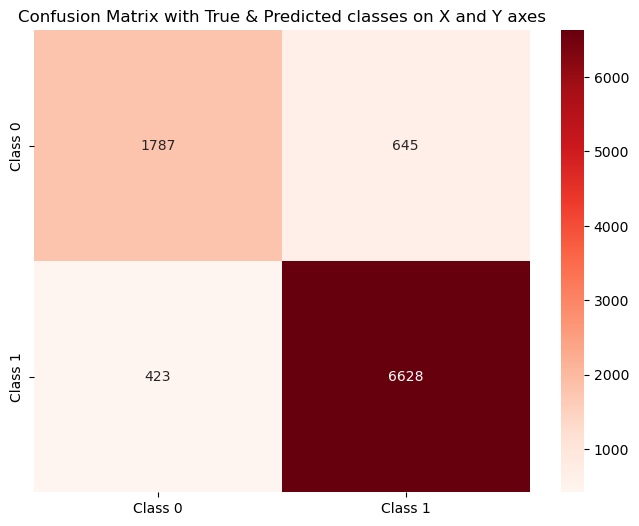

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(Y_test, rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'],
           )

plt.title('Confusion Matrix with True & Predicted classes on X and Y axes')
plt.show()

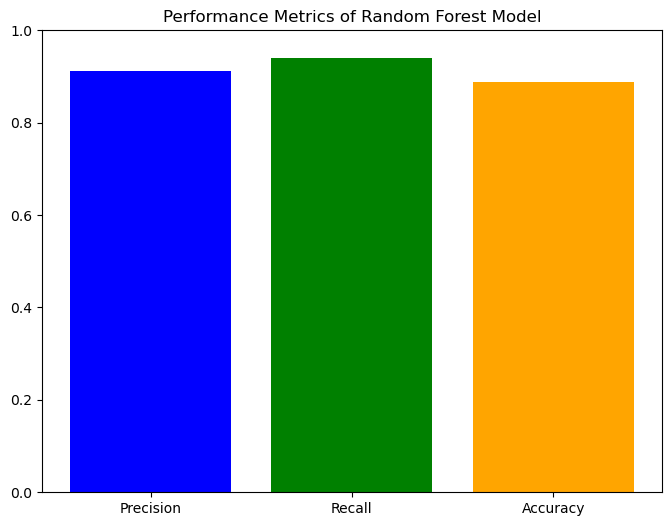

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

rf_precision = precision_score(Y_test, rf_pred)
rf_recall = recall_score(Y_test, rf_pred)
rf_accuracy = accuracy_score(Y_test, rf_pred)

values = [rf_precision, rf_recall, rf_accuracy]
labels = ['Precision', 'Recall', 'Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics of Random Forest Model')

plt.ylim(0, 1)
plt.show()


In [ ]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, Y_train)

dt_pred = decision_tree_model.predict(X_test)

dt_accuracy = accuracy_score(Y_test, dt_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.8996098281134662


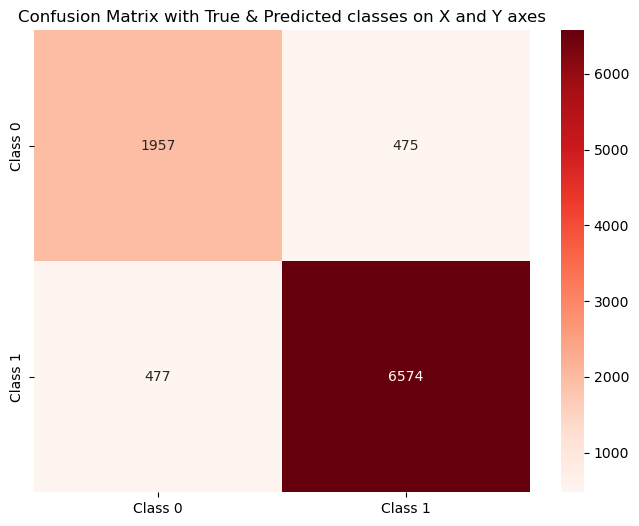

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(Y_test, dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'],
           )

plt.title('Confusion Matrix with True & Predicted classes on X and Y axes')
plt.show()

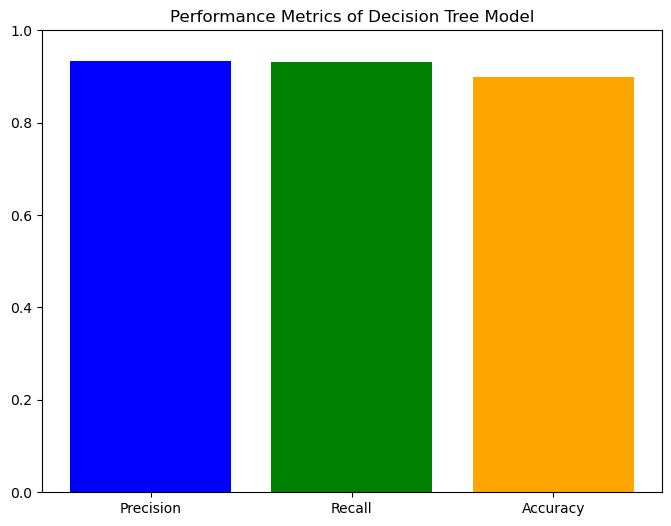

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

dt_precision = precision_score(Y_test, dt_pred)
dt_recall = recall_score(Y_test, dt_pred)
dt_accuracy = accuracy_score(Y_test, dt_pred)

values = [dt_precision, dt_recall, dt_accuracy]
labels = ['Precision', 'Recall', 'Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics of Decision Tree Model')

plt.ylim(0, 1)
plt.show()


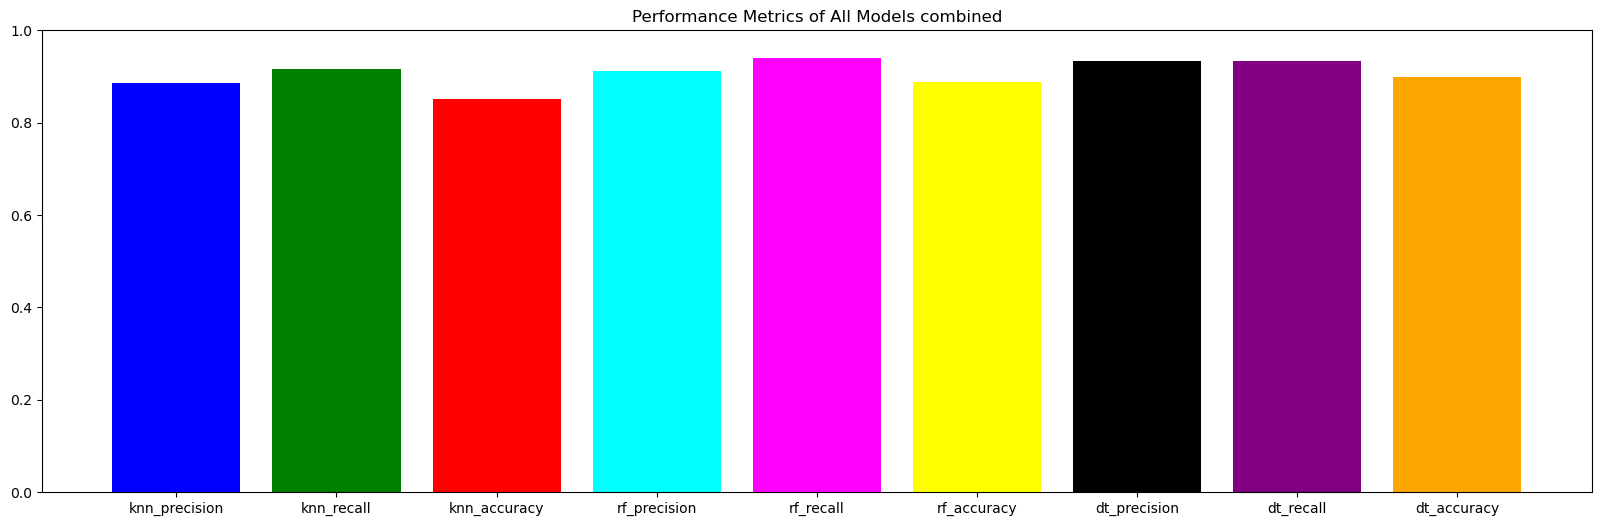

In [ ]:
values = [knn_precision, knn_recall, knn_accuracy, rf_precision, rf_recall, rf_accuracy, dt_precision, dt_recall, dt_accuracy]
labels = ['knn_precision', 'knn_recall', 'knn_accuracy', 'rf_precision', 'rf_recall', 'rf_accuracy', 'dt_precision', 'dt_recall', 'dt_accuracy']

plt.figure(figsize=(20, 6))
plt.bar(labels, values, color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple',
          'orange'])
plt.title('Performance Metrics of All Models combined')

plt.ylim(0, 1)
plt.show()